In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import mpl_finance as mpf
import talib

In [2]:
dOhlcv = pd.read_csv("./TX_daily.csv")
dOhlcv.tail(5)

,trading_point,open,high,low,close,volume
2197,2019-12-10,11647.0,11656.0,11605.0,11625.0,145440
2198,2019-12-11,11600.0,11706.0,11594.0,11706.0,183526
2199,2019-12-12,11765.0,11888.0,11754.0,11853.0,232444
2200,2019-12-13,11977.0,12007.0,11917.0,11965.0,216930
2201,2019-12-16,11932.0,11976.0,11922.0,11961.0,139466


In [3]:
mOhlcv = pd.read_csv("./TX_minutely.csv")
mOhlcv.tail(5)

,trading_point,open,high,low,close,volume
660462,2019-12-16 13:40,11944.0,11945.0,11943.0,11944.0,336
660463,2019-12-16 13:41,11945.0,11949.0,11944.0,11949.0,572
660464,2019-12-16 13:42,11949.0,11951.0,11948.0,11951.0,592
660465,2019-12-16 13:43,11951.0,11953.0,11951.0,11952.0,624
660466,2019-12-16 13:44,11952.0,11957.0,11951.0,11956.0,784


In [7]:
#Data processing
df = copy.deepcopy(dOhlcv)
df = df[-365:]
df["trading_point"] = pd.to_datetime(df["trading_point"])
df.set_index("trading_point", inplace = True)

In [8]:
#Set index
df.index = df.index.format(formatter=lambda x: x.strftime("%Y-%m-%d")) 
df.index[::10]

Index(['2018-06-25', '2018-07-09', '2018-07-23', '2018-08-06', '2018-08-20',
       '2018-09-03', '2018-09-17', '2018-10-02', '2018-10-17', '2018-10-31',
       '2018-11-14', '2018-11-28', '2018-12-12', '2018-12-25', '2019-01-10',
       '2019-01-24', '2019-02-18', '2019-03-06', '2019-03-20', '2019-04-03',
       '2019-04-19', '2019-05-06', '2019-05-20', '2019-06-03', '2019-06-18',
       '2019-07-02', '2019-07-16', '2019-07-30', '2019-08-14', '2019-08-28',
       '2019-09-12', '2019-09-27', '2019-10-15', '2019-10-29', '2019-11-12',
       '2019-11-26', '2019-12-10'],
      dtype='object')

Text(0, 0.5, 'Stock daily open price')

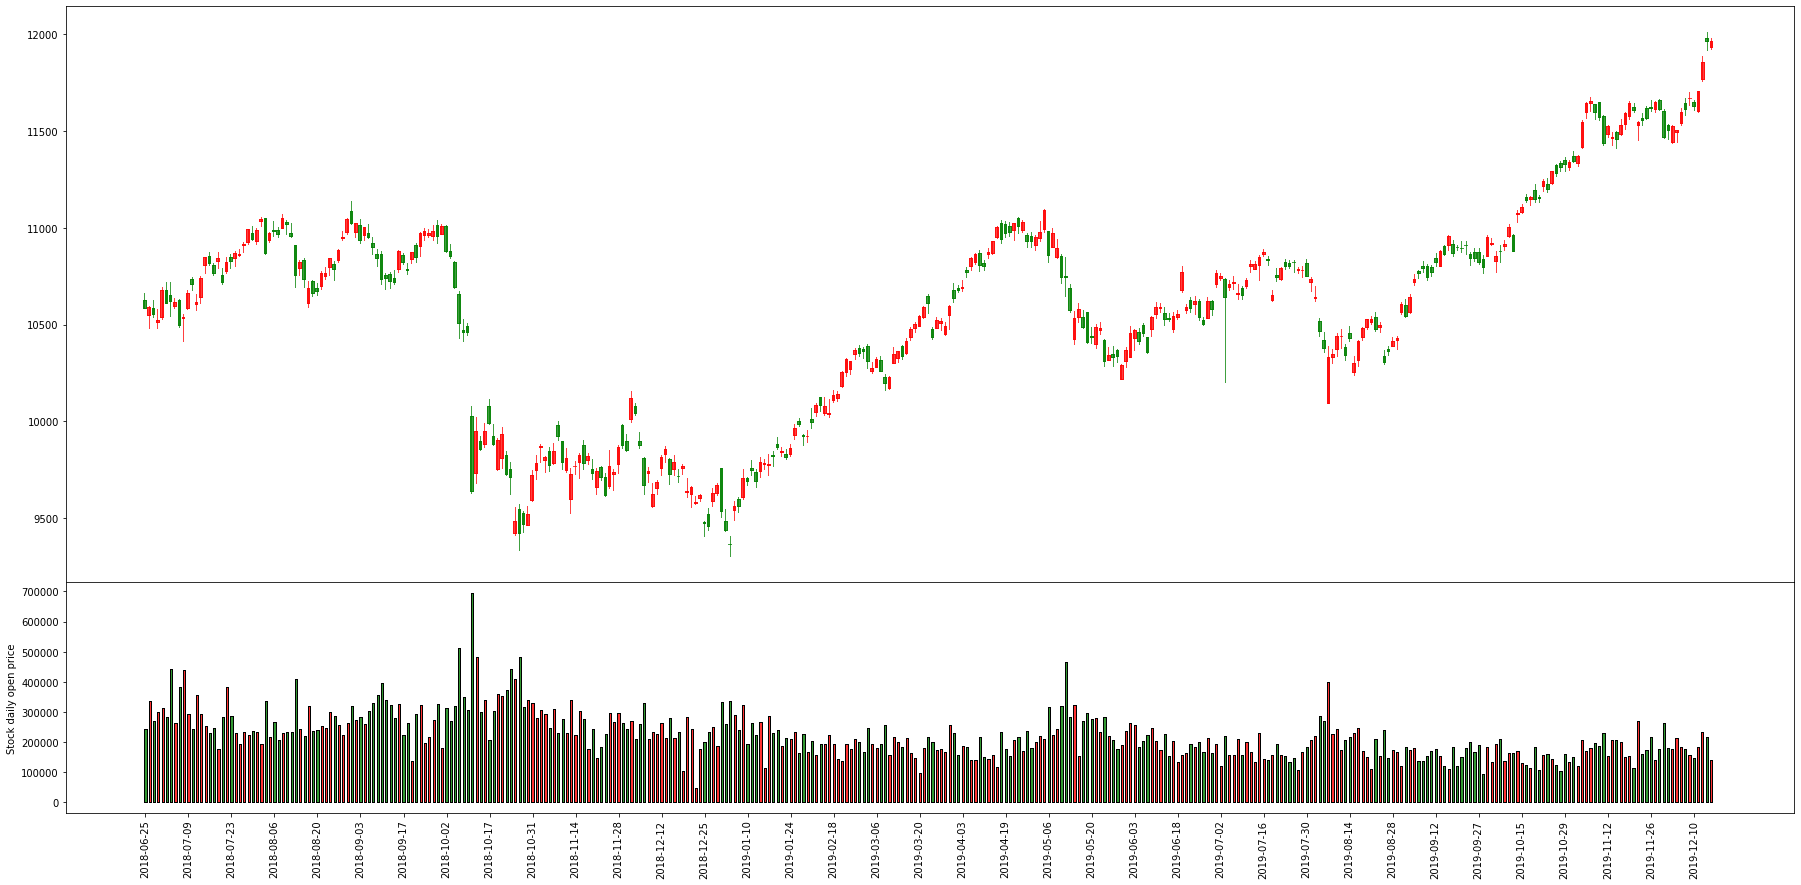

In [9]:
fig = plt.figure(figsize=(24, 16))
ax = fig.add_axes([0,0.2,1,0.5]) 
ax2 = fig.add_axes([0,0,1,0.2])
ax2.set_xticks(range(0, len(df.index), 10))
ax2.set_xticklabels(df.index[::10],rotation=90)

mpf.candlestick2_ohlc(ax, df['open'],df['high'], df['low'], df['close'], width=0.6, colorup='r', colordown='g', alpha=0.75); 
mpf.volume_overlay(ax2, df['open'], df['close'], df['volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)

plt.ylabel('Stock daily open price')


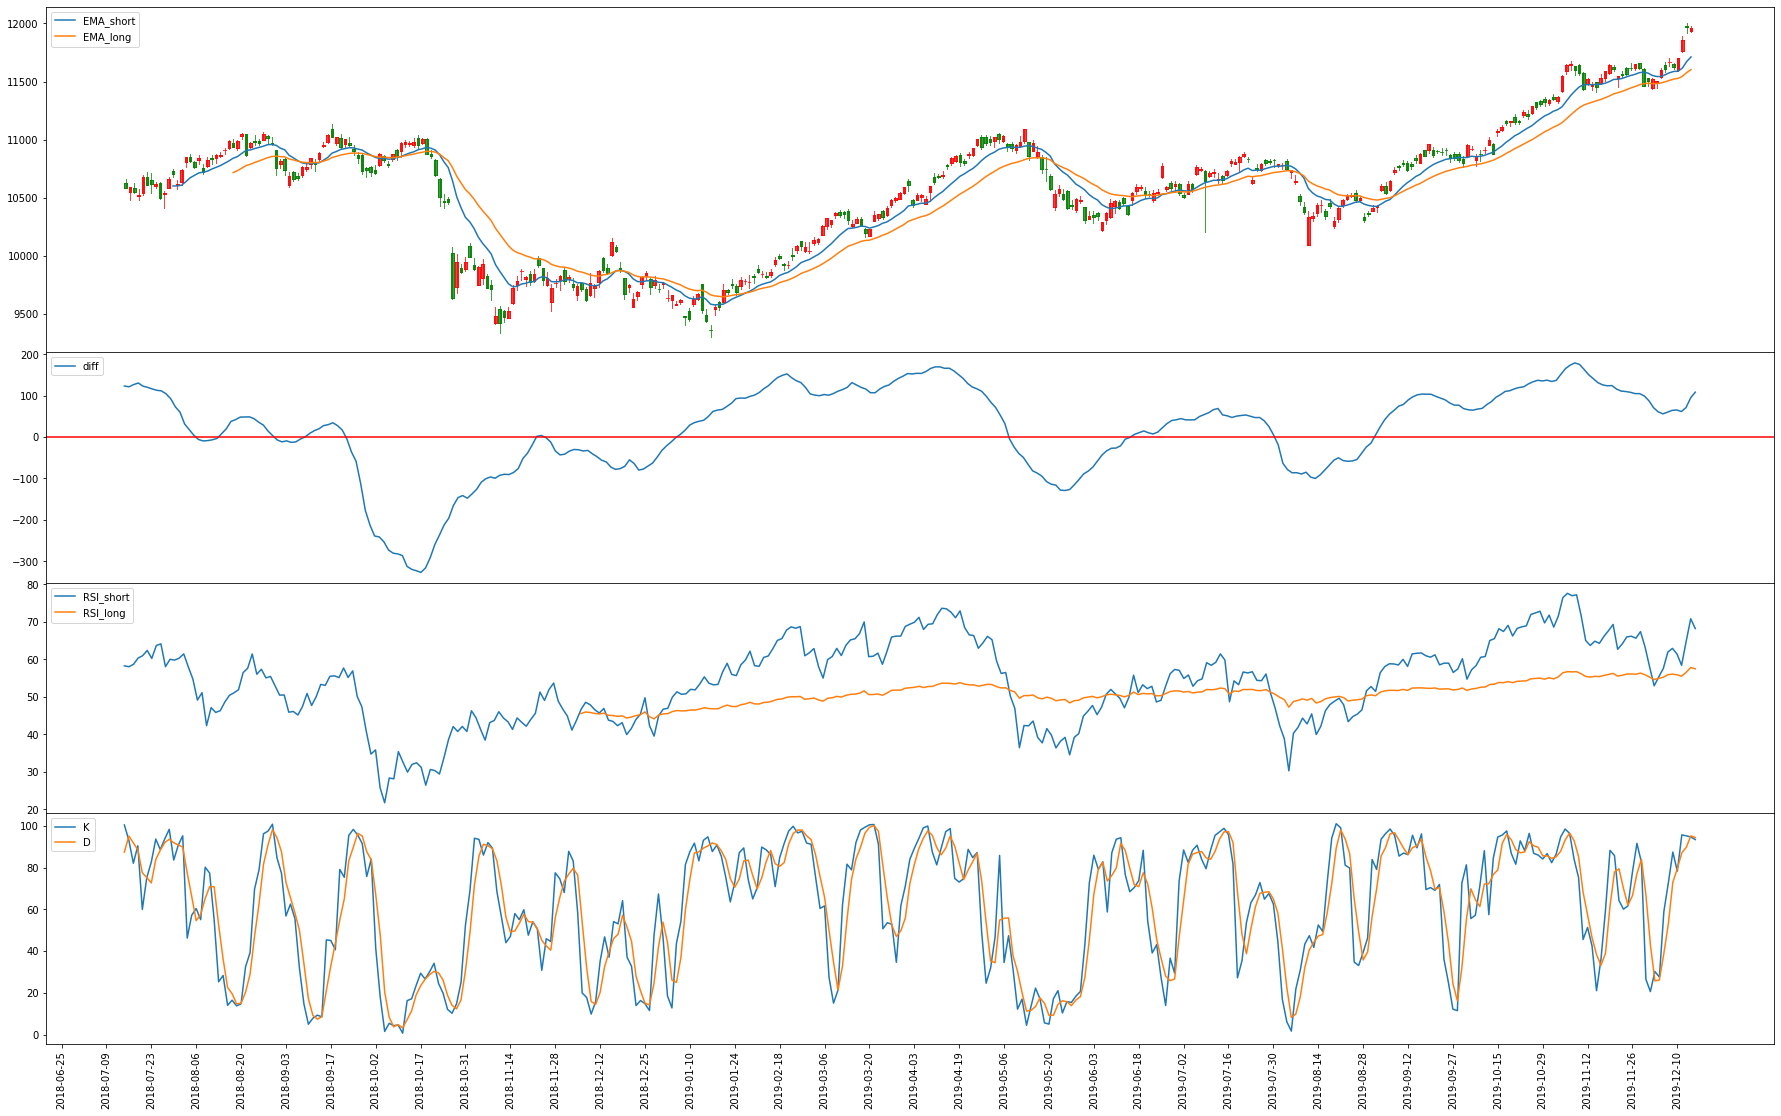

In [16]:
#Draw candle chart with technical index
MA_short = talib.MA(np.array(df["open"]), 12, matype=1)
MA_long = talib.MA(np.array(df["open"]), 26, matype=1)
diff = MA_short - MA_long
RSI_short = talib.RSI(np.array(df["open"]), 20)
RSI_long = talib.RSI(np.array(df["open"]), 120)

fig = plt.figure(figsize=(24, 16))
ax = fig.add_axes([0,0.6,1,0.3])
ax2 = fig.add_axes([0,0.4,1,0.2])  
ax3 = fig.add_axes([0,0.2,1,0.2])  
ax4 = fig.add_axes([0,0,1,0.2]) 

ax4.set_xticks(range(0, len(df.index), 10))
ax4.set_xticklabels(df.index[::10],rotation=90)

mpf.candlestick2_ochl(ax, df["open"], df["close"], df["high"],
                      df["low"], width=0.6, colorup="r", colordown="g", alpha=0.75)

ax.plot(MA_short, label="EMA_short")
ax.plot(MA_long, label="EMA_long")

ax2.plot(diff, label="diff")
ax2.axhline(0, color= 'r')

ax3.plot(RSI_short, label="RSI_short")
ax3.plot(RSI_long, label="RSI_long")

slowk, slowd = talib.STOCH(df.high, df.low, df.close,9,3,3)
ax4.plot(slowk, label='K')
ax4.plot(slowd, label='D')

ax.legend(loc = "upper left")
ax2.legend(loc= "upper left")
ax3.legend(loc = "upper left")
ax4.legend(loc = "upper left")